# NAO data

I copy pasted the data into a csv file and am reading it in. I got the data off:https://www.ncdc.noaa.gov/teleconnections/nao/.

Try and replicate the way they usually represent the data with blue and red bars for the different pahses.

In [1]:
# import packages...

import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import xarray as xr
import pandas as pd

C:\Users\sa07kb\AppData\Local\Continuum\miniconda3\envs\py3_std\lib\site-packages\ipykernel\parentpoller.py:113: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  warnings.warn("""Parent poll failed.  If the frontend dies,


In [2]:
font = {'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

# Using Pandas to read in csv 

In [3]:
# load data
file_name = 'https://www.ncdc.noaa.gov/teleconnections/nao/data.csv' #'/Users/marie-louisekorte/OneDrive - University of the Highlands and Islands/SAMS Summer Internship/Rockall_Trough_MHW/data/NAO.csv'

NAO_data = pd.read_csv(file_name, header = 1)

In [4]:
NAO_data.dtypes

Date       int64
Value    float64
dtype: object

In [5]:
NAO_data

,Date,Value
0,195001,0.92
1,195002,0.40
2,195003,-0.36
3,195004,0.73
4,195005,-0.59
...,...,...
853,202102,0.14
854,202103,0.73
855,202104,-1.43
856,202105,-1.24


In [6]:
NAO_data['Date'] = pd.to_datetime(NAO_data['Date'],format='%Y%m')

In [7]:
NAO_data

,Date,Value
0,1950-01-01,0.92
1,1950-02-01,0.40
2,1950-03-01,-0.36
3,1950-04-01,0.73
4,1950-05-01,-0.59
...,...,...
853,2021-02-01,0.14
854,2021-03-01,0.73
855,2021-04-01,-1.43
856,2021-05-01,-1.24


In [8]:
NAO_data.dtypes

Date     datetime64[ns]
Value           float64
dtype: object

In [9]:
Vp=NAO_data.Value 

positive = NAO_data.Value.where(Vp>0)

In [10]:
positive

0      0.92
1      0.40
2       NaN
3      0.73
4       NaN
       ... 
853    0.14
854    0.73
855     NaN
856     NaN
857    0.77
Name: Value, Length: 858, dtype: float64

In [11]:
Vn=NAO_data.Value 

negative = NAO_data.Value.where(Vn<0)

In [12]:
negative

0       NaN
1       NaN
2     -0.36
3       NaN
4     -0.59
       ... 
853     NaN
854     NaN
855   -1.43
856   -1.24
857     NaN
Name: Value, Length: 858, dtype: float64

In [13]:
NAO_data = NAO_data.assign(VaPos = positive)

In [14]:
NAO_data = NAO_data.assign(VaNeg = negative)

In [15]:
NAO_data

,Date,Value,VaPos,VaNeg
0,1950-01-01,0.92,0.92,NaN
1,1950-02-01,0.40,0.40,NaN
2,1950-03-01,-0.36,NaN,-0.36
3,1950-04-01,0.73,0.73,NaN
4,1950-05-01,-0.59,NaN,-0.59
...,...,...,...,...
853,2021-02-01,0.14,0.14,NaN
854,2021-03-01,0.73,0.73,NaN
855,2021-04-01,-1.43,NaN,-1.43
856,2021-05-01,-1.24,NaN,-1.24


In [16]:
# defining np.arrays for values I want to plot
#np.array(NAO_data.Value)
#np.array(NAO_data.Date)
#np.array(NAO_data.VaPos)
#np.array(NAO_data.VaNeg);

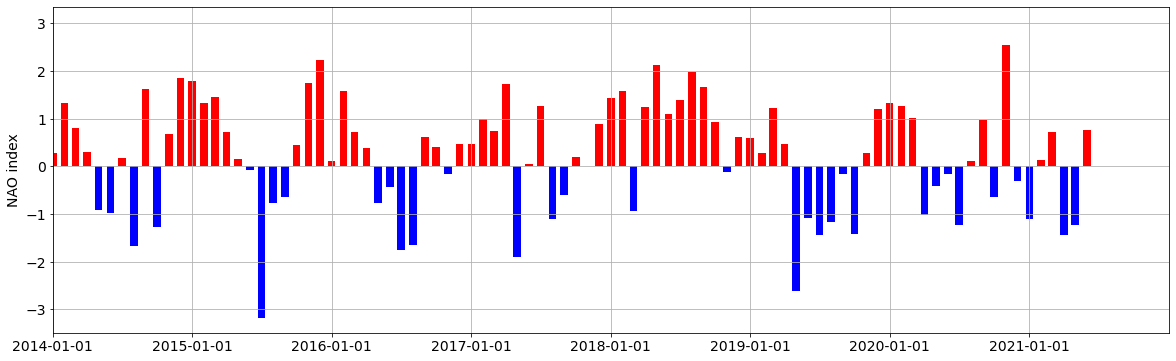

In [28]:
fig, ax=plt.subplots(figsize=(20,6))
ax.bar(NAO_data.Date, NAO_data.VaPos, width=20, color = 'r')
ax.bar(NAO_data.Date, NAO_data.VaNeg, width=20, color = 'b')
ax.set_xticks(NAO_data.Date[0:-1:12])
ax.set_xlim(np.datetime64('2014'), np.datetime64('2022'))
ax.set_ylabel('NAO index')
ax.grid();

In [18]:
# saving the pandas dataframe as csv file

NAO_data.to_csv('data/NAO_all.csv', index=False)

# Experimenting with turning it into an xarry...

In [19]:
# plotting panda data frame
#NAO_data.plot.bar(x = 'Date', y = 'Value'); #writes all dates in xaxis

In [20]:
dsNAO=NAO_data.to_xarray()
dsNAO

<xarray.Dataset>
Dimensions:  (index: 858)
Coordinates:
  * index    (index) int64 0 1 2 3 4 5 6 7 8 ... 850 851 852 853 854 855 856 857
Data variables:
    Date     (index) datetime64[ns] 1950-01-01 1950-02-01 ... 2021-06-01
    Value    (index) float64 0.92 0.4 -0.36 0.73 -0.59 ... 0.73 -1.43 -1.24 0.77
    VaPos    (index) float64 0.92 0.4 nan 0.73 nan ... 0.14 0.73 nan nan 0.77
    VaNeg    (index) float64 nan nan -0.36 nan -0.59 ... nan nan -1.43 -1.24 nan

In [21]:
dsNAO.coords['Date'] = dsNAO.Date
dsNAO = dsNAO.swap_dims({'index':'time'}).drop('index') #.drop_vars('Date')

In [22]:
dsNAO.Date.attrs['units'] = 'days since 1950-01-01 00:00:00'
dsNAO

<xarray.Dataset>
Dimensions:  (time: 858)
Coordinates:
    Date     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2021-06-01
Dimensions without coordinates: time
Data variables:
    Value    (time) float64 0.92 0.4 -0.36 0.73 -0.59 ... 0.73 -1.43 -1.24 0.77
    VaPos    (time) float64 0.92 0.4 nan 0.73 nan nan ... 0.14 0.73 nan nan 0.77
    VaNeg    (time) float64 nan nan -0.36 nan -0.59 ... nan nan -1.43 -1.24 nan

In [23]:
#ds.to_netcdf('data/NAO.nc')

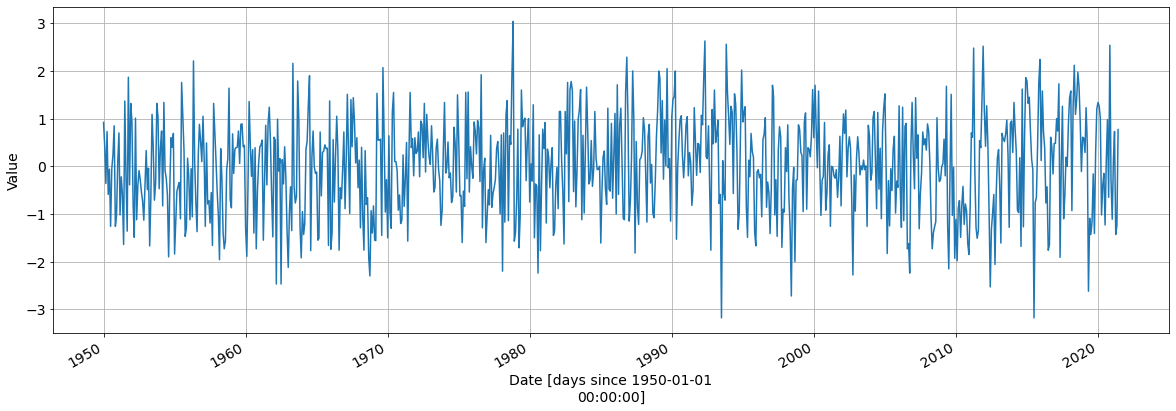

In [24]:
## a bit pointless since I am just making it a series again... I don't think xarray can do bar plots

plt.rcParams['figure.figsize'] = [20, 6]
#NAO_series = dsNAO.Value.to_series()
#NAO_series.plot.bar(x = dsNAO.Date)
#plt.xlim(700,856)
dsNAO.Value.plot(x='Date');
plt.grid();